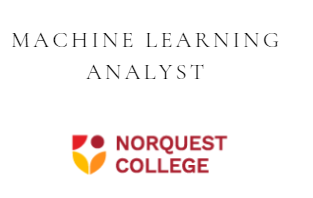

### Assignment: Machine Learning Model Training and Evaluation

**Objective:**  
In this assignment, you will use the **Machine Learning notebook** from last year's project as a starting point. Your goal is to retrain the model using the **2023 Food Drive data** for training and then use the **2024 Food Drive data** as the test set to evaluate the model’s accuracy and effectiveness. You will compare the predictions with the actual results from 2024 and assess the model's performance.

---

### Steps:

1. **Review the ML Notebook**
   - Start by reviewing the Machine Learning notebook provided from last year. Understand the model architecture, feature selection, and data preprocessing steps.
   - Ensure you understand the model’s objective and how predictions were generated for donation volumes, volunteer allocation, or other key metrics.

2. **Data Preparation**
   - **Load the 2023 data** as the training dataset and ensure that the data is cleaned and preprocessed in a way that matches last year's model requirements (feature scaling, missing value handling, etc.).
   - **Load the 2024 data** as the test dataset. Make sure that the test dataset is structured in the same format as the training data, ensuring consistency in features.

3. **Model Training**
   - Using the 2023 data, retrain the model provided in the notebook. Ensure that the parameters, features, and settings used in last year’s notebook are maintained unless you choose to optimize them.
   - Record the model's **training performance metrics**, such as accuracy, loss, or other relevant evaluation metrics based on your model (e.g., RMSE, MAE, precision).

4. **Model Testing**
   - Once the model is trained, use the 2024 data as the **test set**.
   - Generate predictions using the model and compare them to the actual results from the 2024 food drive.
   - Record the model’s **test performance metrics** and compare them to the training metrics.

5. **Accuracy and Performance Analysis**
   - Evaluate the **accuracy** of the model's predictions by comparing them to the actual outcomes from the 2024 data.
   - Use relevant evaluation metrics (e.g., accuracy, precision, recall, F1 score, MAE, RMSE, etc.) to measure the model's performance.
   - Identify **any discrepancies** between the predictions and actual outcomes. Are there any trends or patterns where the model performed well or poorly?





# Load data and run previous EDA

# Modelling

Predicting the **number of donation bags collected** is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

# Solution 1: Donation Prediction


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


data_2023 = pd.read_csv('data_2023_donation_processed.csv')
data_2024 = pd.read_csv('data_2024_donation_processed.csv')

In [ ]:
# Create a dictionary mapping old column names to new column names
column_mapping = {
    'TotalRoutes': 'Routes Completed',
    'Time Spent Collecting Donations': 'Time to Complete (min)',
    '# of Adult Volunteers who participated in this route': '# of Adult Volunteers',
    '# of Doors in Route': 'Doors in Route',  # This column appears twice in X_2024
    '# of Youth Volunteers who participated in this route': '# of Youth Volunteers',
    'total number of volunteers ': 'Total Volunteers',
    'TotalDonationVolume': 'TotalDonationVolume',
    'Ward/Branch': 'Ward/Branch',
    'AvgDoorsPerRoute': 'AvgDoorsPerRoute',
    '# of Donation Bags Collected': 'Donation Bags Collected' # Target Variable
}

# Rename the columns in data_2024 using the mapping
data_2024 = data_2024.rename(columns=column_mapping)

In [ ]:
data_2023 = data_2023.drop('TotalDonationVolume', axis=1).reset_index(drop=True)
data_2024 = data_2024.drop('TotalDonationVolume', axis=1).reset_index(drop=True)

In [ ]:
data_2023

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Ward/Branch,Routes Completed,Doors in Route,Time Spent,New Route Number/Name,TotalRoutes,AvgDoorsPerRoute,Total Volunteers
0,2023-09-23 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1,3,14,25.0,0,Clareview Ward,2,14,25.000000,Bonnie Doon Stake 1,127,14.0,4
1,2023-09-23 10:36:52,Gateway Stake Centre,Gateway Stake,3,1,18,25.0,1,Crawford Plains Ward,2,144,30.000000,Gateway Stake 1,192,144.0,4
2,2023-09-23 10:40:22,Gateway Stake Centre,Gateway Stake,2,0,20,30.0,0,Silver Berry Ward,2,186,30.000000,Gateway Stake 2,192,186.0,2
3,2023-09-23 10:41:08,Gateway Stake Centre,Gateway Stake,2,0,20,25.0,1,Crawford Plains Ward,1,196,30.000000,Gateway Stake 3,192,196.0,2
4,2023-09-23 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1,0,2,5.0,0,Londonderry Ward,2,1,-30.894484,Bonnie Doon Stake 2,127,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2023-09-27 14:24:33,North Stake Centre,Edmonton North Stake,2,0,20,20.0,0,Namao Ward,2,150,45.000000,Edmonton North Stake 53,57,150.0,2
446,2023-09-27 14:24:35,North Stake Centre,Edmonton North Stake,2,0,20,20.0,0,Namao Ward,2,150,45.000000,Edmonton North Stake 54,57,150.0,2
447,2023-09-28 20:44:23,Parkland (Spruce Grove/Stony Plain),Edmonton North Stake,2,4,51,60.0,1,Stony Plain Ward,2,196,120.000000,Edmonton North Stake 55,57,196.0,6
448,2023-10-15 11:15:43,North Stake Centre,Edmonton North Stake,3,0,78,150.0,1,Griesbach Ward,3,600,150.000000,Edmonton North Stake 56,57,600.0,3


In [ ]:
data_2024

,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),# of Adult Volunteers,# of Youth Volunteers,Doors in Route,Donation Bags Collected,Total Volunteers,New Route Number/Name,Routes Completed,AvgDoorsPerRoute,TotalVolunteers
0,Bearspaw Chapel,Riverbend Stake,676,15,7,7,78,599,14,Riverbend Stake 1,94,78,14
1,Bearspaw Chapel,Gateway Stake,0,15,0,0,0,0,0,Gateway Stake 1,82,0,0
2,Londonberry Chapel,Bonnie Doon Stake,Unassigned,15,1,0,1,1,1,Bonnie Doon Stake 1,104,1,1
3,Gateway Stake Centre,Gateway Stake,50,15,2,2,20,20,4,Gateway Stake 2,82,20,4
4,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,15,2,2,20,15,4,Bonnie Doon Stake 2,104,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Riverbend Stake Centre,Riverbend Stake,Greenfield 7,45,2,0,211,47,2,Riverbend Stake 109,94,211,2
444,Riverbend Stake Centre,Riverbend Stake,70,15,2,1,58,6,3,Riverbend Stake 110,94,58,3
445,Bonnie Doon Stake Centre,Bonnie Doon Stake,King Edward Park 4,45,2,0,150,23,2,Bonnie Doon Stake 119,104,150,2
446,Riverbend Stake Centre,Riverbend Stake,Greenfield 3,1,1,0,140,33,1,Riverbend Stake 111,94,140,1


In [ ]:
data_2023['VolunteersPerDoor'] = data_2023['Total Volunteers'] / data_2023['Doors in Route']
data_2023['TimePerVolunteer'] = data_2023['Time to Complete (min)'] / data_2023['Total Volunteers']


# Features for Model 1 (excluding volunteer data)
features_model1 = ['Routes Completed', 'Time to Complete (min)', 'Doors in Route', 'AvgDoorsPerRoute']
# Features for Model 2 (including volunteer data)
features_model2 = features_model1 + ['Total Volunteers', '# of Adult Volunteers', '# of Youth Volunteers', 'VolunteersPerDoor', 'TimePerVolunteer']
target_variable = 'Donation Bags Collected'  # Or 'Time to Complete (min)'


In [ ]:
# Calculate 'VolunteersPerDoor' and 'TimePerVolunteer' for data_2024 as well
data_2024['VolunteersPerDoor'] = data_2024['Total Volunteers'] / data_2024['Doors in Route']
data_2024['TimePerVolunteer'] = data_2024['Time to Complete (min)'] / data_2024['Total Volunteers']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    data_2023[features_model2], data_2023[target_variable], test_size=0.2, random_state=42
)

In [ ]:
X_test = data_2024[features_model2]
y_test = data_2024[target_variable]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):

    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f" Mean Squared Error (MSE): {mse:.2f}")
    print(f" R-squared (R2): {r2:.2f}")

In [ ]:
# Initialize and train the model (using the validation set)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model on the validation set
evaluate_model(y_val, y_pred_val, "Model (Validation Set)")

Model (Validation Set) Evaluation:
 Mean Squared Error (MSE): 1205.27
 R-squared (R2): -1.78


In [ ]:
# Replace infinite values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values (e.g., with the mean)
for column in X_test.columns:
    X_test[column].fillna(X_test[column].mean(), inplace=True)
    # or X_test[column].fillna(X_test[column].median(), inplace=True)

# Check for and handle large values (optional)
for column in X_test.columns:
    # If values are too large, consider scaling or clipping them
    # Example: Clipping values to a specific range
    X_test[column] = np.clip(X_test[column], a_min=-1e10, a_max=1e10)  # Adjust the range as needed

# Now try making predictions again
y_pred_test = model.predict(X_test)

<ipython-input-12-78a764e15d56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-12-78a764e15d56>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test[column].fillna(X_test[column].mean(), inplace=True)
<ipython-input-12-78a764e15d56>:6: SettingWithCopyWarning: 
A value 

In [ ]:
# Make predictions on the 2024 test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the 2024 test set
evaluate_model(y_test, y_pred_test, "Model (2024 Test Set)")

Model (2024 Test Set) Evaluation:
 Mean Squared Error (MSE): 7064.87
 R-squared (R2): -2.80


In [ ]:
# Make predictions on the 2024 test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the 2024 test set
evaluate_model(y_test, y_pred_test, "Model (2024 Test Set)")

Model (2024 Test Set) Evaluation:
 Mean Squared Error (MSE): 7064.87
 R-squared (R2): -2.80


In [ ]:
data_2024['Predicted Donation Bags'] = y_pred_test  # Add predictions to DataFrame
print(data_2024[['New Route Number/Name', 'Predicted Donation Bags']])
# Save the DataFrame to a CSV file named 'predictions_2024.csv'
data_2024[['New Route Number/Name', 'Predicted Donation Bags']].to_csv('predictions_2024.csv', index=False)
print("Predictions saved to predictions_2024.csv")

     New Route Number/Name  Predicted Donation Bags
0        Riverbend Stake 1                   332.19
1          Gateway Stake 1                    97.47
2      Bonnie Doon Stake 1                    99.42
3          Gateway Stake 2                   100.29
4      Bonnie Doon Stake 2                   100.29
..                     ...                      ...
443    Riverbend Stake 109                    93.09
444    Riverbend Stake 110                    95.89
445  Bonnie Doon Stake 119                    92.12
446    Riverbend Stake 111                    94.49
447    Riverbend Stake 112                    86.85

[448 rows x 2 columns]
Predictions saved to predictions_2024.csv


In [ ]:
print(data_2024.columns)

Index(['Drop Off Location', 'Stake', 'Route Number/Name',
       'Time to Complete (min)', '# of Adult Volunteers',
       '# of Youth Volunteers', 'Doors in Route', 'Donation Bags Collected',
       'Total Volunteers', 'New Route Number/Name', 'Routes Completed',
       'AvgDoorsPerRoute', 'TotalVolunteers', 'VolunteersPerDoor',
       'TimePerVolunteer', 'Predicted Donation Bags'],
      dtype='object')


In [ ]:
predictions_2024 = pd.read_csv('predictions_2024.csv')
data_2024 = pd.read_csv('data_2024_donation_processed.csv')
merged_data = pd.merge(predictions_2024, data_2024[['New Route Number/Name', '# of Donation Bags Collected']], on='New Route Number/Name', how='left')
merged_data.to_csv('predictions_with_actual_2024.csv', index=False)
merged_data

,New Route Number/Name,Predicted Donation Bags,# of Donation Bags Collected
0,Riverbend Stake 1,332.19,599
1,Gateway Stake 1,97.47,0
2,Bonnie Doon Stake 1,99.42,1
3,Gateway Stake 2,100.29,20
4,Bonnie Doon Stake 2,100.29,15
...,...,...,...
443,Riverbend Stake 109,93.09,47
444,Riverbend Stake 110,95.89,6
445,Bonnie Doon Stake 119,92.12,23
446,Riverbend Stake 111,94.49,33


In [ ]:
max_donation_bags = merged_data['# of Donation Bags Collected'].max()
print(f"The biggest value in '# of Donation Bags Collected' is: {max_donation_bags}")

The biggest value in '# of Donation Bags Collected' is: 599


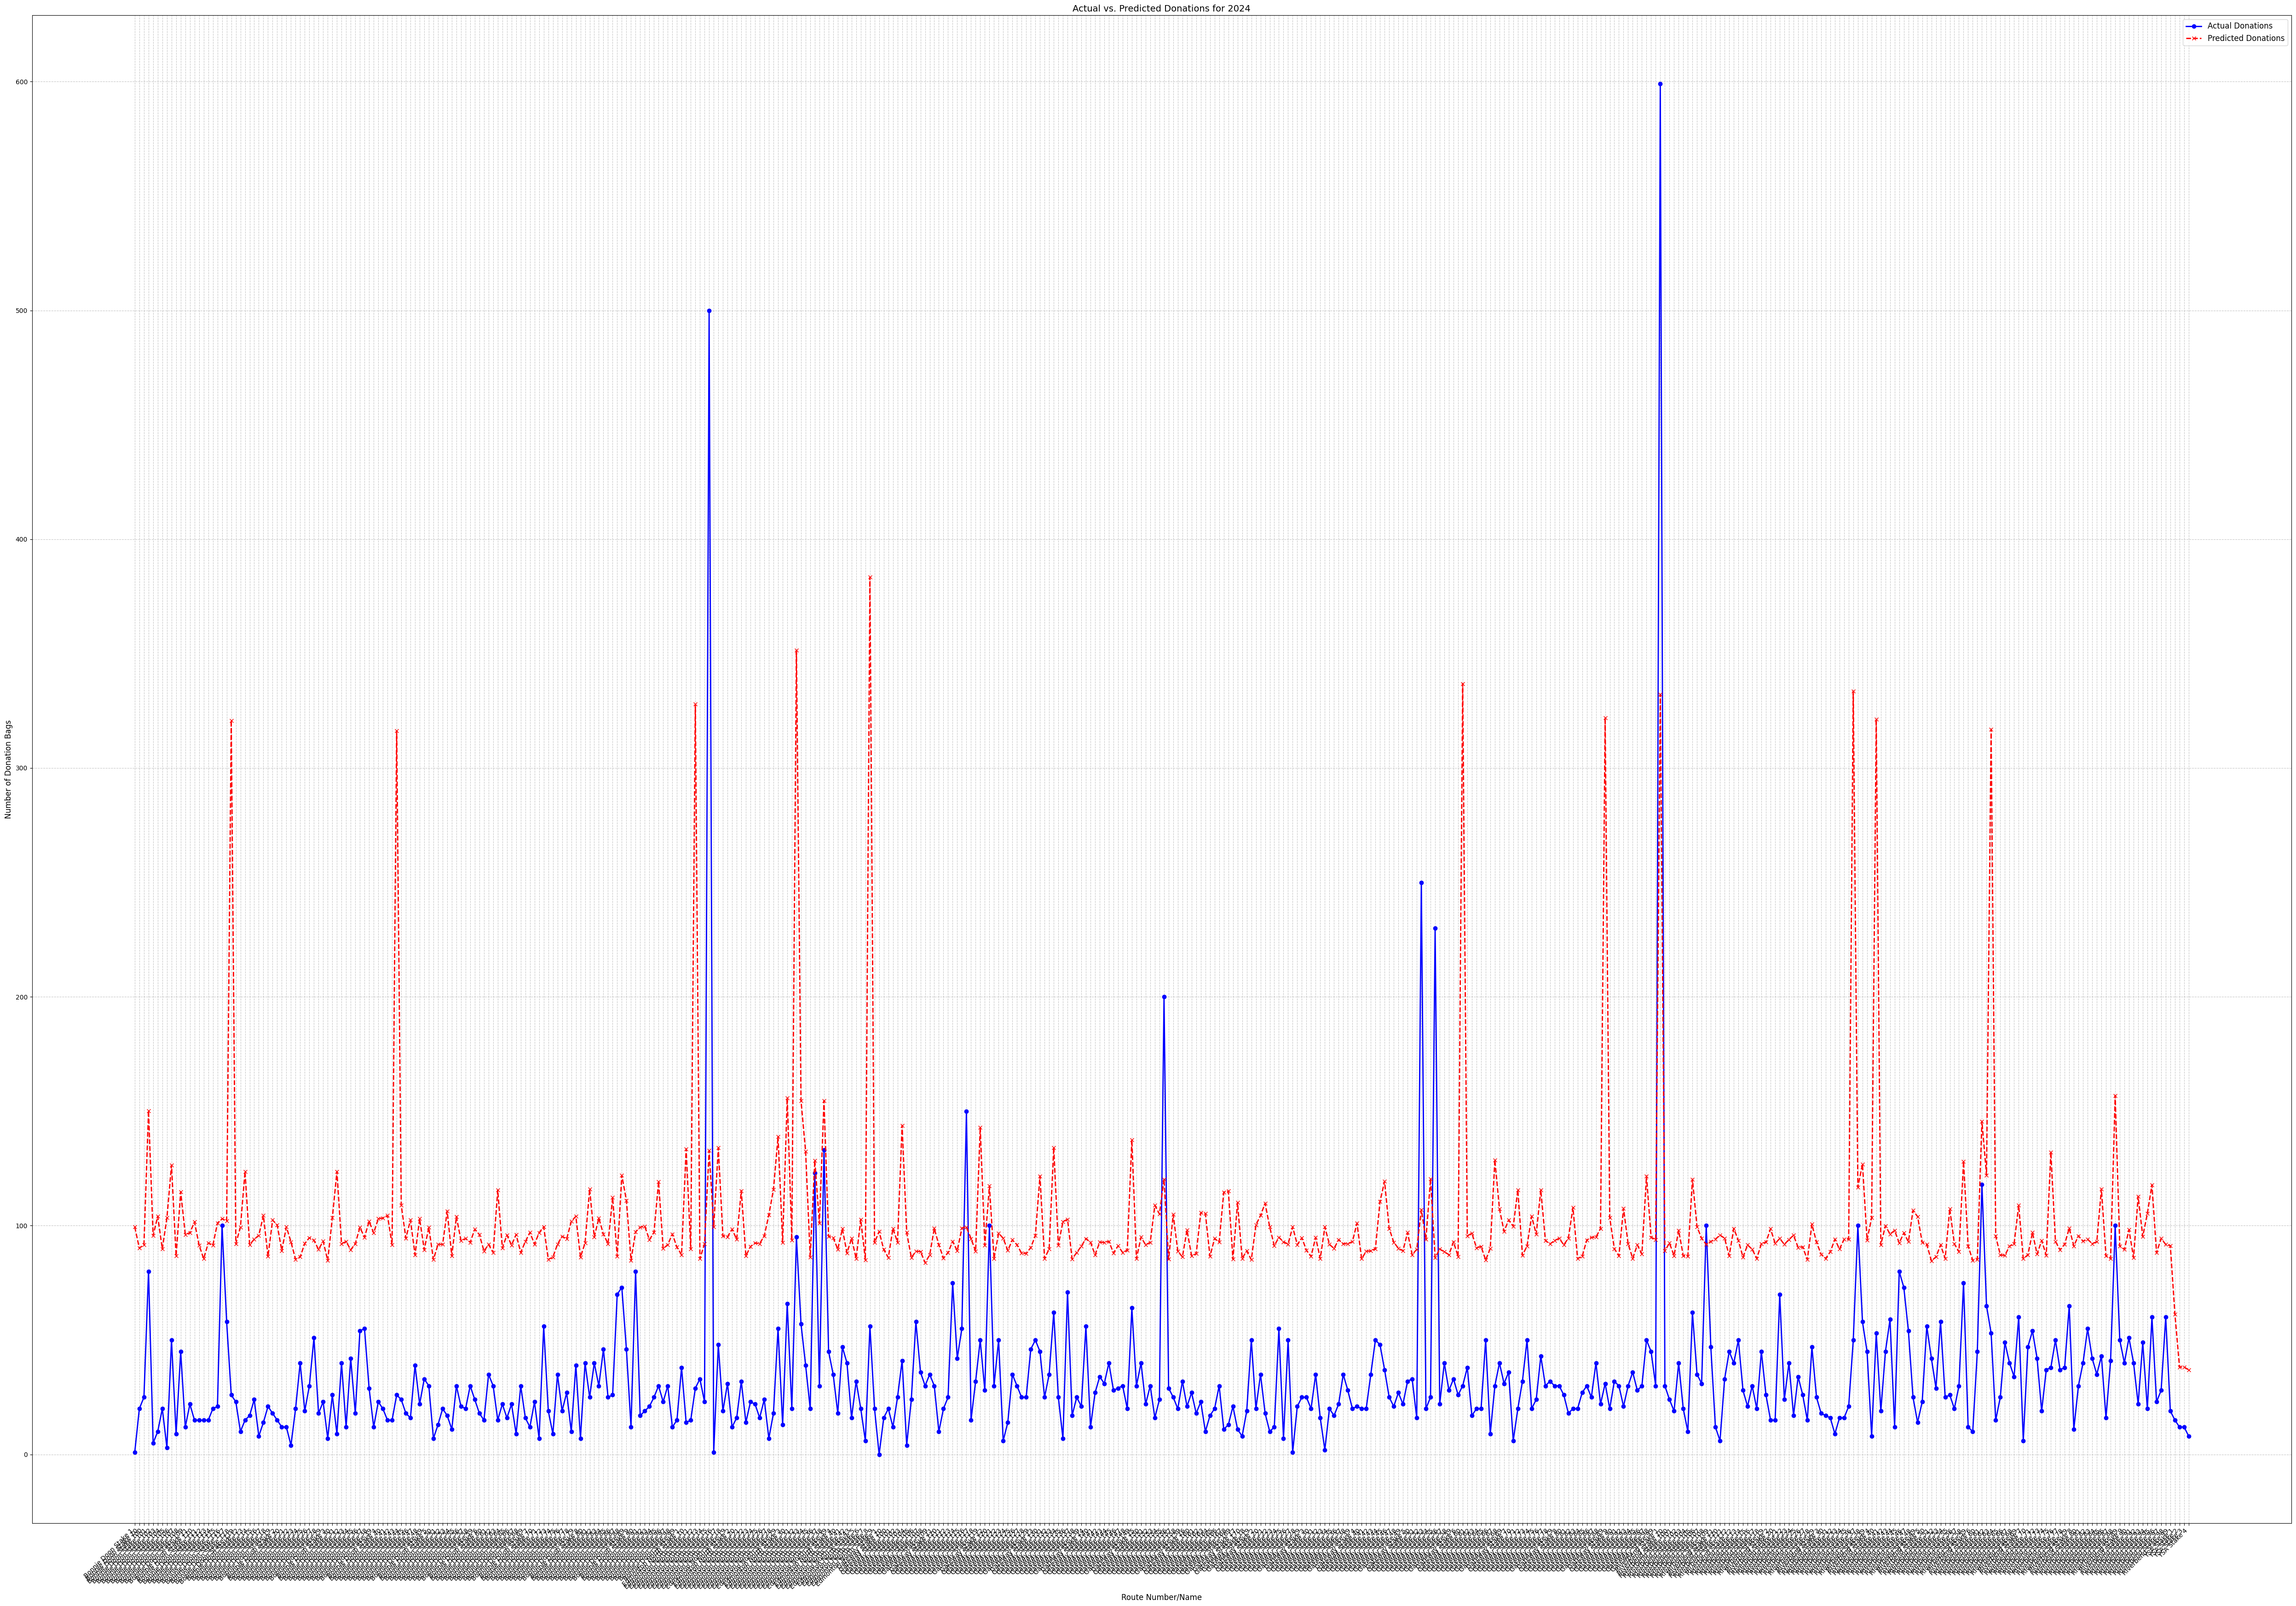

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
predictions_with_actual_2024 = pd.read_csv('predictions_with_actual_2024.csv')

# Sort data by route number/name
predictions_with_actual_2024 = predictions_with_actual_2024.sort_values(by=['New Route Number/Name'])


# Create the line chart with improved readability
plt.figure(figsize=(50, 35))  # Increased figure size

# Plot actual donations
plt.plot(predictions_with_actual_2024['New Route Number/Name'],
         predictions_with_actual_2024['# of Donation Bags Collected'],
         label='Actual Donations', marker='o', color='blue', linewidth=2)

# Plot predicted donations
plt.plot(predictions_with_actual_2024['New Route Number/Name'],
         predictions_with_actual_2024['Predicted Donation Bags'],
         label='Predicted Donations', marker='x', color='red', linewidth=2, linestyle='--')

# Customize the chart
plt.xlabel('Route Number/Name', fontsize=12)  # Increased font size
plt.ylabel('Number of Donation Bags', fontsize=12)  # Increased font size
plt.title('Actual vs. Predicted Donations for 2024', fontsize=14)  # Increased font size
plt.legend(fontsize=12)  # Increased font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size of x-axis labels
plt.grid(True, linestyle='--', alpha=0.7)  # Added a grid for better readability
plt.tight_layout()

# Show the chart
plt.show()

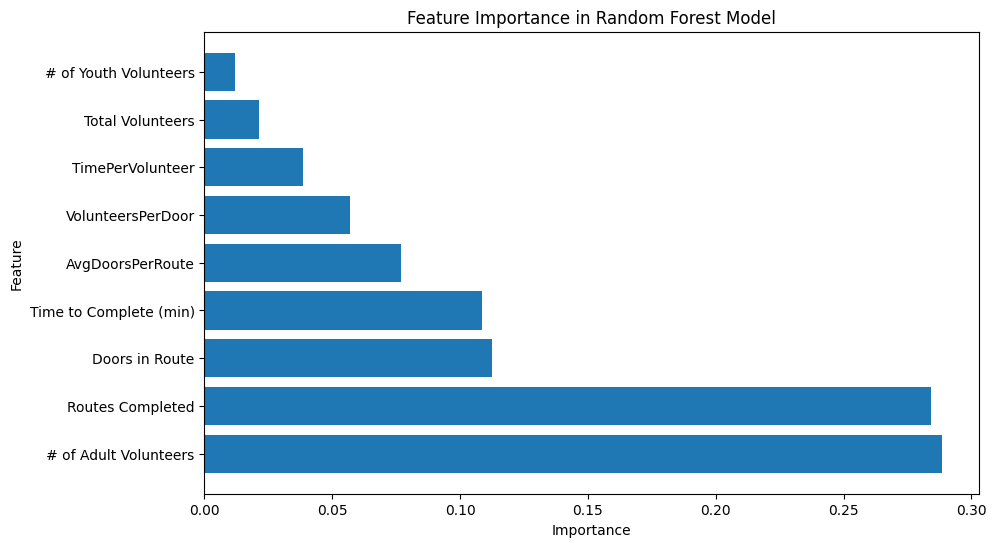

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
# Ensure 'features' has the same length as 'importances'
features = features_model2
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
# Changed 'features_model2' to 'feature' to match plt.barh call
feature_importances = feature_importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [ ]:
import joblib
model_filename = 'trained_donation_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to: {model_filename}")

Model saved to: trained_donation_model.pkl


In [ ]:
# Model 1 training (without volunteer data)
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train[features_model1], y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Model 2 training (with volunteer data)
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 3. Evaluation and Analysis:
y_pred_model1 = model1.predict(X_test[features_model1])
y_pred_model2 = model2.predict(X_test)

In [ ]:
# Evaluate using metrics (MSE, RMSE, R², MAE)
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}, R²: {r2}, MAE: {mae}")

evaluate_model(y_test, y_pred_model1, "Model 1 (Without Volunteer Data)")
evaluate_model(y_test, y_pred_model2, "Model 2 (With Volunteer Data)")

Model 1 (Without Volunteer Data) - MSE: 5100.403457852742, RMSE: 71.41710899954396, R²: -1.7445604983182275, MAE: 59.54544382440476
Model 2 (With Volunteer Data) - MSE: 7064.867677734374, RMSE: 84.05276722234893, R²: -2.8016515584275212, MAE: 73.26021205357142


new training

In [ ]:
# Select the desired features for the new model
new_features = ['AvgDoorsPerRoute', 'Time to Complete (min)', 'Doors in Route', 'Routes Completed', '# of Adult Volunteers']

In [ ]:
# Prepare the training and testing data using the new features
X_train_new = data_2023[new_features]
y_train_new = data_2023[target_variable]  # Assuming 'target_variable' is still 'Donation Bags Collected'
X_test_new = data_2024[new_features]
y_test_new = data_2024[target_variable]

In [ ]:
# Initialize and train a new RandomForestRegressor model
new_model = RandomForestRegressor(random_state=42)  # Or any other regressor you prefer
new_model.fit(X_train_new, y_train_new)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions and evaluate the model on the test set
y_pred_new = new_model.predict(X_test_new)
evaluate_model(y_test_new, y_pred_new, "New Model")  # Using your existing evaluate_model function

New Model Evaluation:
 Mean Squared Error (MSE): 6889.44
 R-squared (R2): -2.71


In [ ]:
# Generate predictions using the retrained model
predictions = new_model.predict(X_test_new)

# Create a new DataFrame with predictions and 'New Route Number/Name'
predictions_df = pd.DataFrame({'New Route Number/Name': data_2024['New Route Number/Name'],
                               'Predicted Donation Bags': predictions})

# Display the DataFrame (optional)
print(predictions_df)

# Save the DataFrame to a CSV file (optional)
predictions_df.to_csv('predictions_new_model.csv', index=False)

     New Route Number/Name  Predicted Donation Bags
0        Riverbend Stake 1               250.390000
1          Gateway Stake 1                94.820000
2      Bonnie Doon Stake 1                94.820000
3          Gateway Stake 2                94.670000
4      Bonnie Doon Stake 2                94.670000
..                     ...                      ...
443    Riverbend Stake 109                97.310000
444    Riverbend Stake 110                94.540000
445  Bonnie Doon Stake 119                99.333571
446    Riverbend Stake 111                90.260000
447    Riverbend Stake 112                89.490000

[448 rows x 2 columns]


In [ ]:
# Merge predictions_df with data_2024 to include actual donation bags collected
predictions_with_actual = pd.merge(predictions_df,
                                   data_2024[['New Route Number/Name', '# of Donation Bags Collected']],
                                   on='New Route Number/Name',
                                   how='left')

# Display the merged DataFrame (optional)
print(predictions_with_actual)

# Save the merged DataFrame to a CSV file (optional)
predictions_with_actual.to_csv('predictions_with_actual_new_model.csv', index=False)

     New Route Number/Name  Predicted Donation Bags  \
0        Riverbend Stake 1               250.390000   
1          Gateway Stake 1                94.820000   
2      Bonnie Doon Stake 1                94.820000   
3          Gateway Stake 2                94.670000   
4      Bonnie Doon Stake 2                94.670000   
..                     ...                      ...   
443    Riverbend Stake 109                97.310000   
444    Riverbend Stake 110                94.540000   
445  Bonnie Doon Stake 119                99.333571   
446    Riverbend Stake 111                90.260000   
447    Riverbend Stake 112                89.490000   

     # of Donation Bags Collected  
0                             599  
1                               0  
2                               1  
3                              20  
4                              15  
..                            ...  
443                            47  
444                             6  
445            

In [ ]:
import joblib

# Specify the filename for the saved model
model_filename = 'newly_trained_model.pkl'  # You can choose a different filename

# Save the model using joblib.dump()
joblib.dump(new_model, model_filename)

print(f"Model saved to: {model_filename}")

Model saved to: newly_trained_model.pkl


# Compare with other Regressor Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Decision Tree - Mean Squared Error: 34062.566498015876
Decision Tree - R-squared (R²): -17.329290075642355

K-Nearest Neighbors (KNN) - Mean Squared Error: 14148.576785714287
K-Nearest Neighbors (KNN) - R-squared (R²): -6.613441813844612

Random Forest - Mean Squared Error: 7325.865470814731
Random Forest - R-squared (R²): -2.942096179908143

Gradient Boosting - Mean Squared Error: 7123.610356812224
Gradient Boosting - R-squared (R²): -2.833261378688745



*Which model performed best?*

Ans - According to the evaluation scores, Random Forest Regressor performed the best, because it had the lowest Mean Squared Error out of all.

# Save the best performing model

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Assuming 'random_forest' is your best trained Random Forest Regressor model
model = random_forest  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'random_forest_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['random_forest_model.pkl']

In [ ]:
model2 = random_forest
joblib.dump(model2, 'random_forest_model2.pkl')


['random_forest_model2.pkl']

# Determine Feature Imporance- Regression Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
model = joblib.load('random_forest_model.pkl')

In [ ]:
model = random_forest

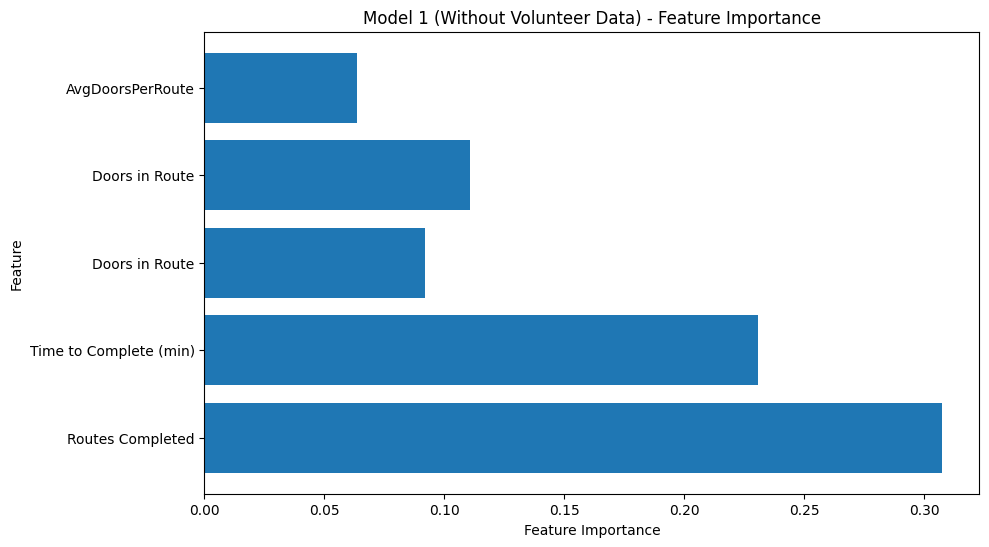

In [ ]:
feature_importance_model1 = model1.feature_importances_
feature_names_model1 = features_model1  # Using the features for Model 1

feature_importance_model1 = feature_importance_model1[:len(feature_names_model1)]

# Create a bar plot to visualize feature importance for Model 1
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_model1)), feature_importance_model1, align='center')
plt.yticks(range(len(feature_importance_model1)), feature_names_model1)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Model 1 (Without Volunteer Data) - Feature Importance')
plt.show()

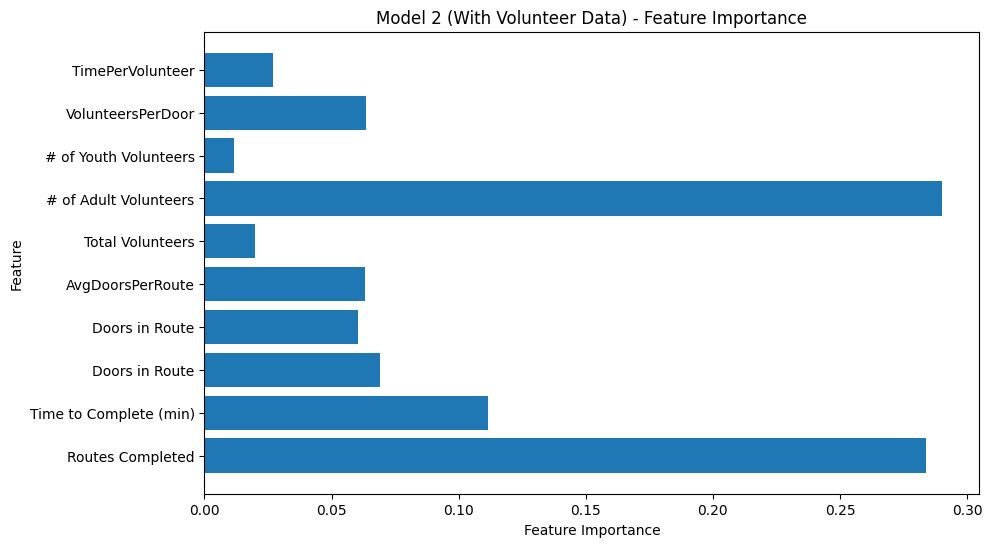

In [ ]:
feature_importance_model2 = model2.feature_importances_
feature_names_model2 = features_model2  # Using the features for Model 2

feature_importance_model2 = feature_importance_model2[:len(feature_names_model2)]

# Create a bar plot to visualize feature importance for Model 2
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_model2)), feature_importance_model2, align='center')
plt.yticks(range(len(feature_importance_model2)), feature_names_model2)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Model 2 (With Volunteer Data) - Feature Importance')
plt.show()

In [ ]:
data_2024.to_csv('data_2024.csv', index=False)

In [ ]:
import joblib
import pandas as pd

# Load the model
model = joblib.load('trained_donation_model.pkl')

# Load the 2024 data
data_2024 = pd.read_csv('data_2024_donation_processed.csv')

def predict_donations(route_features, num_volunteers, model):
    """Predicts donations for a given route and number of volunteers."""
    # Get all the features used during training
    training_features = model.feature_names_in_

    # Create input features for prediction, ensuring all training features are present
    features = pd.DataFrame(columns=training_features)

    # Populate the features DataFrame with available data from route_features
    for feature in training_features:
        if feature in route_features.columns:
            features[feature] = route_features[feature]
        elif feature == 'Total Volunteers':
            features[feature] = num_volunteers
        else:
            # Handle missing features, e.g., set to 0 or mean
            features[feature] = 0  # Or another appropriate value

    # Predict donations
    predicted_donations = model.predict(features)
    return predicted_donations[0]

# Create a list to store the results
results = []

for route in data_2024['New Route Number/Name'].unique():
    route_data = data_2024[data_2024['New Route Number/Name'] == route]
    route_features = route_data[['TotalRoutes', 'AvgDoorsPerRoute', '# of Doors in Route']]

    best_num_volunteers = 0
    max_donations = 0

    for num_volunteers in range(1, 11):
        predicted_donations = predict_donations(route_features, num_volunteers, model)

        if predicted_donations > max_donations:
            max_donations = predicted_donations
            best_num_volunteers = num_volunteers

    # Append the results to the list
    results.append([route, best_num_volunteers])

# Create a DataFrame from the results list
optimal_volunteers_df = pd.DataFrame(results, columns=['Route', 'Optimal Volunteers'])

# Print the DataFrame
print(optimal_volunteers_df)

                     Route  Optimal Volunteers
0        Riverbend Stake 1                   7
1          Gateway Stake 1                   6
2      Bonnie Doon Stake 1                   6
3          Gateway Stake 2                   6
4      Bonnie Doon Stake 2                   6
..                     ...                 ...
443    Riverbend Stake 109                   4
444    Riverbend Stake 110                   7
445  Bonnie Doon Stake 119                   7
446    Riverbend Stake 111                   7
447    Riverbend Stake 112                   7

[448 rows x 2 columns]


In [ ]:
optimal_volunteers_df.to_csv('optimal_volunteers.csv', index=False)

In [ ]:
optimal_volunteers = pd.read_csv('optimal_volunteers.csv')
data_2024 = pd.read_csv('data_2024_donation_processed.csv')
data_2024.rename(columns={'New Route Number/Name': 'Route'}, inplace=True)
merged_df = pd.merge(optimal_volunteers, data_2024[['Route', 'TotalVolunteers']], on='Route', how='left')
merged_df.to_csv('merged_volunteers.csv', index=False)
print(merged_df)

                     Route  Optimal Volunteers  TotalVolunteers
0        Riverbend Stake 1                   7               14
1          Gateway Stake 1                   6                0
2      Bonnie Doon Stake 1                   6                1
3          Gateway Stake 2                   6                4
4      Bonnie Doon Stake 2                   6                4
..                     ...                 ...              ...
443    Riverbend Stake 109                   4                2
444    Riverbend Stake 110                   7                3
445  Bonnie Doon Stake 119                   7                2
446    Riverbend Stake 111                   7                1
447    Riverbend Stake 112                   7                3

[448 rows x 3 columns]


In [ ]:
max_volunteers = merged_df['TotalVolunteers'].max()
print(f"The highest value in 'TotalVolunteers' is: {max_volunteers}")

The highest value in 'TotalVolunteers' is: 167


In [ ]:
max_volunteers = merged_df['TotalVolunteers'].max()
filtered_df = merged_df[merged_df['TotalVolunteers'] == max_volunteers]
corresponding_route = filtered_df['Route'].iloc[0]

print(f"The corresponding route for the highest value of TotalVolunteers ({max_volunteers}) is: {corresponding_route}")

The corresponding route for the highest value of TotalVolunteers (167) is: Gateway Stake 21


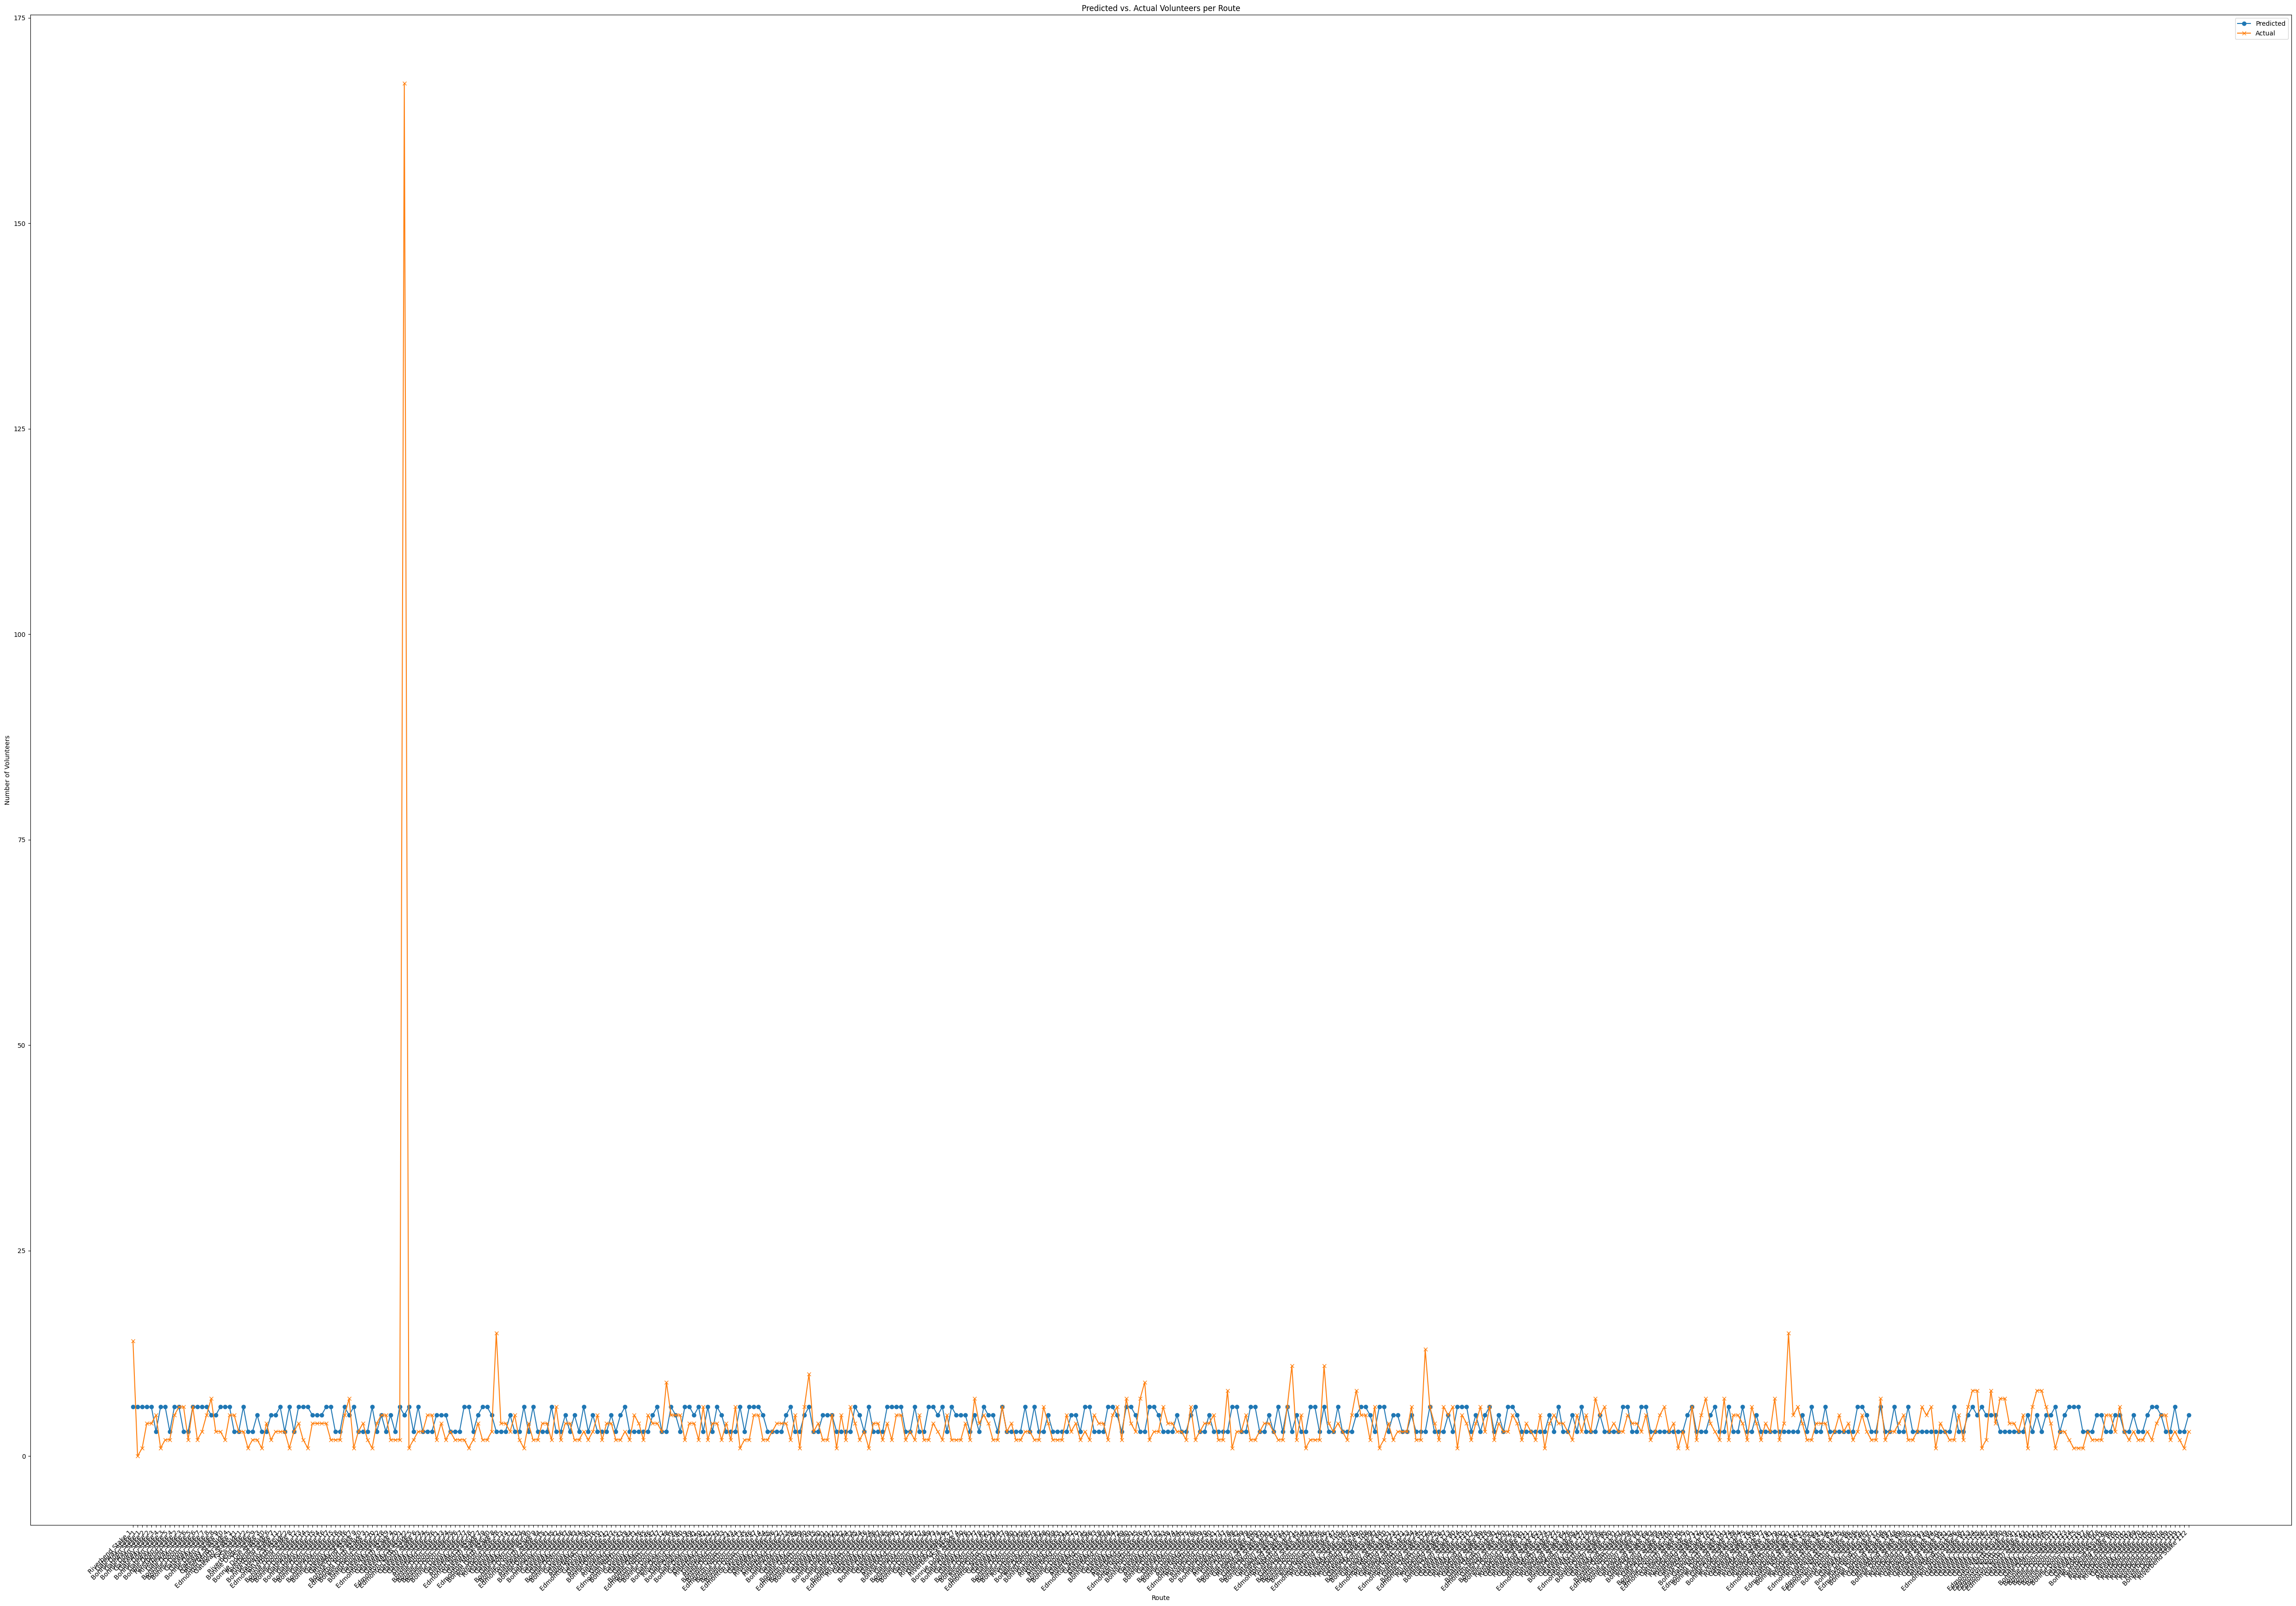

In [ ]:
plt.figure(figsize=(50, 35))  # Adjust figure size as needed
plt.plot(merged_df['Route'], merged_df['Optimal Volunteers'], label='Predicted', marker='o')
plt.plot(merged_df['Route'], merged_df['TotalVolunteers'], label='Actual', marker='x')
plt.xlabel('Route')
plt.ylabel('Number of Volunteers')
plt.title('Predicted vs. Actual Volunteers per Route')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert predictions and actual values to integers if they are not already
merged_df['Optimal Volunteers'] = merged_df['Optimal Volunteers'].astype(int)
merged_df['TotalVolunteers'] = merged_df['TotalVolunteers'].astype(int)

# Calculate accuracy
accuracy = accuracy_score(merged_df['TotalVolunteers'], merged_df['Optimal Volunteers'])

print(f"Accuracy of the volunteer model: {accuracy:}")

Accuracy of the volunteer model: 0.12053571428571429


# Lab Assignment (Individual)

1. Predict time spent per Ward/Neighbourhood (2023)
2. Predict Time Spent per Ward?Neighbourhood & Route (2023 & 2024)
3. Create a Threshold and determine Routes that lasted more than 60 minutes to complete
4. Check for data imbalance in your label. What is Data imbalance? What steps can be taken to address Data imbalance.
5. Generate Evaluation reports

6. **Reflection and Recommendations**
   - Reflect on the model’s performance:
     - Were the predictions close to the actual results?
     - Were there any specific routes or wards where the model was more accurate or less accurate?
   - Provide recommendations for improving the model. Consider adjustments such as feature engineering, different model architectures, or new data that could be incorporated to improve accuracy in future predictions.

7. **Submission**
   - Submit your updated notebook with the following:
     - Model training and testing code.
     - Analysis of the model’s performance.
     - A short reflection (1-2 paragraphs) on the accuracy of the predictions and suggestions for improving the model.

---



# Team Tasks

### Group 1: Year-on-Year Comparison (2023 vs 2024)
**Focus:** Perform a year-on-year comparison between the 2023 and 2024 food drives, analyzing donations, volunteer participation, and route completion times.  
**ML Task:** Comparative Analysis  
**Objective:** Build a model that predicts how donation predictions from 2023 align with 2024.

### Group 2: Geospatial Analysis of Neighborhood and Route Data
**Focus:** Conduct a geospatial analysis using neighborhood and route data, exploring areas contributing the most/least.  
**ML Task:** Geospatial Donation Prediction  
**Objective:** Develop a model to identify which neighborhoods are likely to contribute the most/least donations based on geospatial and demographic features.  
**Approach:** Apply geospatial clustering algorithms (e.g., K-means) to explore patterns between donation volumes and geographic or property value data.

### Group 3: Volunteer Allocation and Efficiency
**Focus:** Analyze how volunteer allocation impacted route completion times and donation volumes.  
**ML Task:** Volunteer Efficiency Modeling  
**Objective:** Predict the optimal number of volunteers needed for each route to maximize efficiency and donations collected.  
**Approach:** Explore the relationship between volunteer numbers, time taken, and donation volumes. Run the ML model with and without volunteer data. Determine if the model performs better or worse.

### Group 4: In-Depth Analysis of Belmead Ward
**Focus:** Conduct a detailed analysis of the Belmead Ward, comparing it with other wards in terms of donations, volunteer participation, and route efficiency.  
**ML Task:** Route Efficiency and Performance Modeling  
**Objective:** Build a model to predict which routes in Belmead Ward are most efficient and why, focusing on factors like route length, number of homes, and volunteer numbers.  
**Approach:** Use clustering techniques (e.g., K-means) and decision trees to categorize routes and predict efficiency based on historical data.

### Group 5: Property Assessment Data Correlation
**Focus:** Investigate the correlation between property values and donation volumes using the property assessment data alongside donation data.  
**ML Task:** Correlation and Impact Analysis  
**Objective:** Develop a model that predicts donation volumes based on property values in different neighborhoods.  
**Approach:** Bin routes per neighborhood. Run the ML model with and without property assessment values. Evaluate if the model performs better or worse.

### Group 6: Predictive Modeling Insights
**Focus:** Present predictive modeling results on donation volumes or time spent per route.  
**ML Task:** Time-to-Completion and Donation Prediction  
**Objective:** Predict how long it will take to complete each route and the expected donation volume for future drives.

### Group 7: Sentiment Analysis of Comments
**Focus:** Use sentiment analysis to evaluate volunteer comments and explore patterns across different wards.  
**ML Task:** Sentiment Classification and Correlation Analysis  
**Objective:** Build a model that classifies volunteer comments into positive, neutral, or negative categories, identifying correlations with donation success in each ward.


### Deliverables:
1. **Updated ML Notebook** with 2023 data as training and 2024 data as test data.
2. **Performance Metrics** comparing the model’s predictions to actual 2024 results.
3. **Reflection** on model accuracy and suggestions for improvement.